# 1. Load Required Libraries

In [1]:
# Load your libraries here
library(ggplot2)
library(quantmod)

Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: TTR

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



---

# 2. Fetch the Data

In [2]:
# Get your data here
palt <-getSymbols("PALT", src = "yahoo", from = "2018-01-01", to = "2021-01-01", auto.assign = FALSE)

---

# 3. Exploring the Data

In [8]:
# Explore your data here
head(palt)
tail(palt)
summary(palt)


           PALT.Open PALT.High PALT.Low PALT.Close PALT.Volume PALT.Adjusted
2018-01-02      7.26      7.26     6.96       7.15        3000          7.15
2018-01-03      7.00      7.00     6.34       6.99        8900          6.99
2018-01-04      6.90      7.00     6.90       7.00        1100          7.00
2018-01-05      7.00      7.00     7.00       7.00           0          7.00
2018-01-08      7.01      7.01     6.55       6.55        1200          6.55
2018-01-09      6.55      6.55     6.55       6.55           0          6.55

           PALT.Open PALT.High PALT.Low PALT.Close PALT.Volume PALT.Adjusted
2020-12-23      1.57      1.57     1.50       1.50        1600          1.50
2020-12-24      1.50      1.50     1.50       1.50           0          1.50
2020-12-28      1.50      1.61     1.45       1.50        9700          1.50
2020-12-29      1.57      1.61     1.39       1.59       15500          1.59
2020-12-30      1.51      1.56     1.39       1.50        9800          1.50
2020-12-31      1.36      1.48     1.36       1.46        6200          1.46

     Index              PALT.Open       PALT.High        PALT.Low    
 Min.   :2018-01-02   Min.   :0.600   Min.   :0.630   Min.   :0.600  
 1st Qu.:2018-10-01   1st Qu.:1.278   1st Qu.:1.327   1st Qu.:1.240  
 Median :2019-07-04   Median :3.100   Median :3.100   Median :3.000  
 Mean   :2019-07-03   Mean   :3.210   Mean   :3.298   Mean   :3.129  
 3rd Qu.:2020-04-02   3rd Qu.:5.000   3rd Qu.:5.005   3rd Qu.:5.000  
 Max.   :2020-12-31   Max.   :7.260   Max.   :7.600   Max.   :7.000  
   PALT.Close     PALT.Volume    PALT.Adjusted  
 Min.   :0.630   Min.   :    0   Min.   :0.630  
 1st Qu.:1.270   1st Qu.:    0   1st Qu.:1.270  
 Median :3.100   Median :  200   Median :3.100  
 Mean   :3.233   Mean   : 1571   Mean   :3.233  
 3rd Qu.:5.000   3rd Qu.: 1200   3rd Qu.:5.000  
 Max.   :7.300   Max.   :42900   Max.   :7.300  

ERROR: Error in desc(palt): could not find function "desc"


---

# 4. Visualising the Data

Don't know how to automatically pick scale for object of type xts/zoo. Defaulting to continuous.



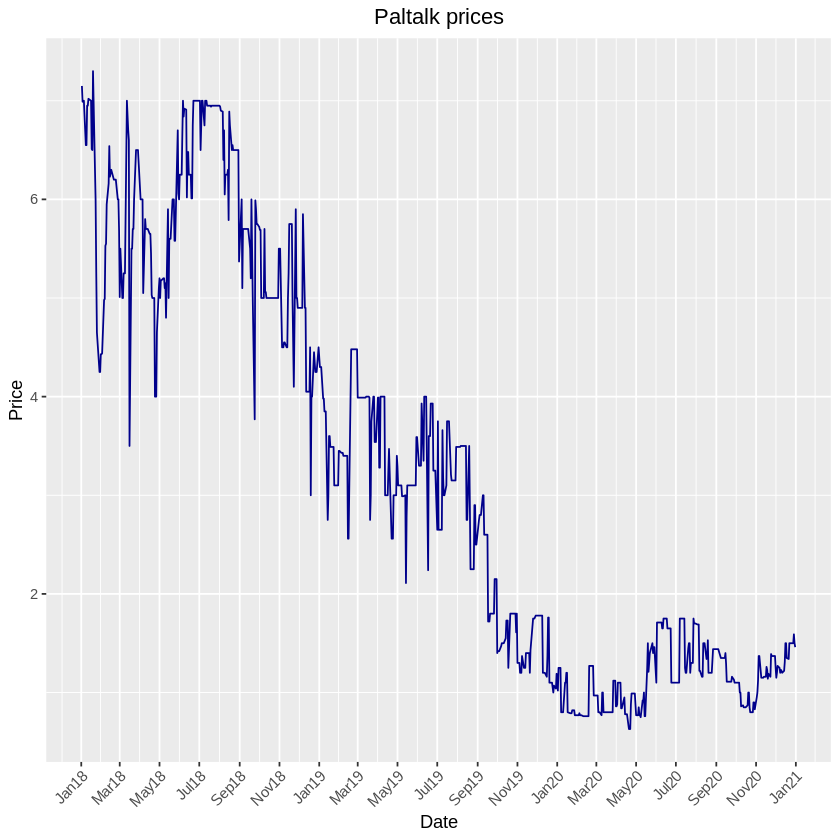

In [7]:
# Visualise your data here
ggplot(data = palt, aes (x= index(palt), y = palt[,6]))+ geom_line(color ="darkblue")+ ggtitle("Paltalk prices") + xlab("Date") +ylab("Price")+ theme(axis.text.x = element_text(angle = 45,hjust = 1), plot.title = element_text(hjust=0.5))+ scale_x_date(date_labels = "%b%y", date_breaks = "2 months") 

---

# 5. Calculating the Moving Averages

In [3]:
# Calculate the moving averages here
palt1 <- subset(palt, index(palt) >="2018-01-01")
palt_ma10<- rollmean(palt1[,6],10, fill = list(NA,NULL,NA), align = "right")
palt_ma30<- rollmean(palt1[,6],30, fill = list(NA,NULL,NA), align = "right")
palt1$ma10<- coredata(palt_ma10)
palt1$ma30<- coredata(palt_ma30)
tail(palt1)


           PALT.Open PALT.High PALT.Low PALT.Close PALT.Volume PALT.Adjusted
2020-12-23      1.57      1.57     1.50       1.50        1600          1.50
2020-12-24      1.50      1.50     1.50       1.50           0          1.50
2020-12-28      1.50      1.61     1.45       1.50        9700          1.50
2020-12-29      1.57      1.61     1.39       1.59       15500          1.59
2020-12-30      1.51      1.56     1.39       1.50        9800          1.50
2020-12-31      1.36      1.48     1.36       1.46        6200          1.46
            ma10     ma30
2020-12-23 1.364 1.276333
2020-12-24 1.392 1.288000
2020-12-28 1.422 1.299667
2020-12-29 1.459 1.314000
2020-12-30 1.478 1.325333
2020-12-31 1.474 1.332000

---

# 6. Plotting the Moving Averages

Don't know how to automatically pick scale for object of type xts/zoo. Defaulting to continuous.

Warning message:
“Removed 9 rows containing missing values (geom_path).”
Warning message:
“Removed 29 rows containing missing values (geom_path).”


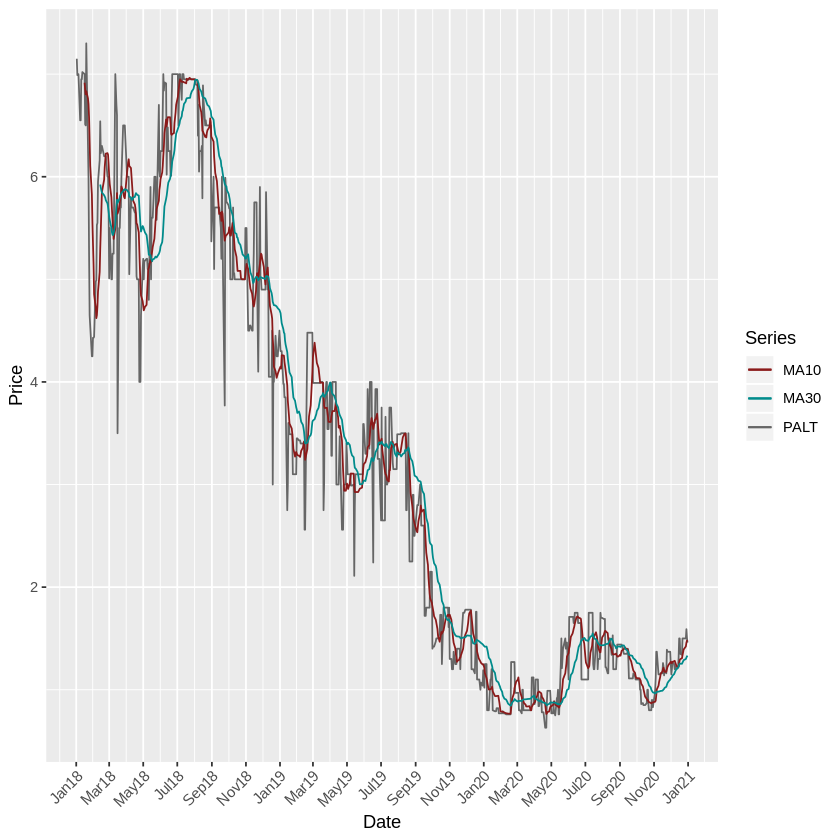

In [8]:
ggplot(data = palt1, aes(x = index(palt1))) +
  geom_line(aes(y = palt1[,6], color = "PALT")) +
  geom_line(aes(y = palt1$ma10, color = "MA10")) +
  geom_line(aes(y = palt1$ma30, color = "MA30")) +
  xlab("Date") +
  ylab("Price") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        plot.title = element_text(hjust = 0.5),
        panel.border = element_blank()) +
  scale_x_date(date_labels = "%b%y", date_breaks = "2 months") +
  scale_colour_manual("Series", values = c("PALT" = "grey40", "MA10" = "firebrick4", "MA30" = "darkcyan"))


---

# 7. Computing the Retruns

In [6]:
# Compute the returns here "PALT"
returns <- diff(log(palt1[,6]))
returns_1 <- returns[-1,]
summary(returns_1)

     Index            PALT.Adjusted      
 Min.   :2018-01-03   Min.   :-0.634307  
 1st Qu.:2018-10-02   1st Qu.: 0.000000  
 Median :2019-07-05   Median : 0.000000  
 Mean   :2019-07-04   Mean   :-0.002104  
 3rd Qu.:2020-04-02   3rd Qu.: 0.000000  
 Max.   :2020-12-31   Max.   : 0.559616  

---

# 8. Visualising the Returns

Don't know how to automatically pick scale for object of type xts/zoo. Defaulting to continuous.



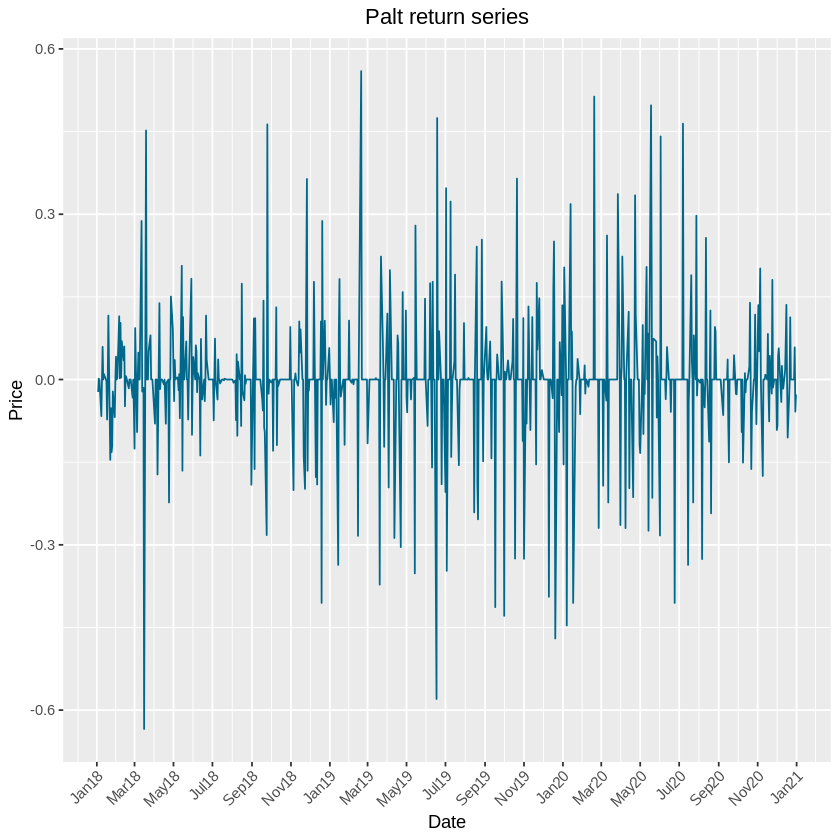

In [12]:
ggplot(data = returns_1,aes(x=index(returns_1),y = returns_1)) +xlab("Date")+ylab("Price")+ geom_line(color = "deepskyblue4") + ggtitle("Palt return series") + theme(axis.text.x = element_text(angle = 45,hjust = 1), plot.title = element_text(hjust = 0.5)) + scale_x_date(date_label = "%b%y", date_break = "2 months")

---